# Распределение Пуассона

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def PoissonDistribution(mu, x):
    '''
    mu - is a paramter > 0
    x - array of real numbers (optional: np.array(..., dtype=float32))
    '''

    X = np.zeros_like(x)
    for i in range(X.shape[0]):
        X[i] = (mu**x[i])/np.math.factorial(int(x[i]))*np.exp(-mu)
    return X

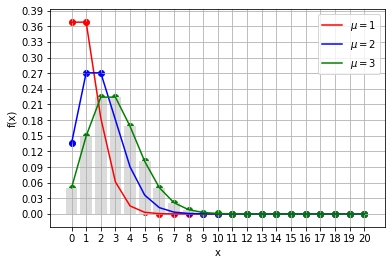

In [3]:
x = np.linspace(0, 20, 21)
plt.plot(x, PoissonDistribution(1, x), 'r', label='$\mu=1$')
plt.plot(x, PoissonDistribution(2, x), 'b', label='$\mu=2$')
plt.plot(x, PoissonDistribution(3, x), 'g', label='$\mu=3$')
plt.scatter(x, PoissonDistribution(1, x), marker='o', color='red')
plt.scatter(x, PoissonDistribution(2, x), marker='o', color='blue')
plt.scatter(x, PoissonDistribution(3, x), marker='o', color='green')
plt.bar(x, PoissonDistribution(3, x), color='#dbdbdb')

plt.xticks(np.arange(0,21,step=1))
plt.yticks(np.arange(0,0.4, step=0.03))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ1/Images/Poisson_destr.pdf')

# Моделирование Пуассоновской величины

http://help.prognoz.com/ru/mergedProjects/Lib/05_statistics/distribution/lib_poissondistribution.htm
http://www.statmod.ru/wiki/_media/books:vv:simulation_v4.pdf
http://www.lib.uniyar.ac.ru/edocs/iuni/20150401.pdf

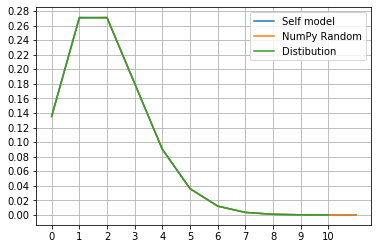

In [4]:
import pandas as pd

def random_poisson(mu, size=1):
    poisson_array = np.zeros(size, dtype='int8')
    for k in range(size):
        a = np.exp(-mu)
        b = 1
        i = 0
        u = np.random.uniform(0. , 1.)
        b = b*u
        while b>=a:
            u = np.random.uniform(0., 1.)
            b = b*u
            i+=1
        poisson_array[k] = i
        
    return poisson_array


def transform_numbers(num_arr):
    d = {}
    size = len(num_arr)
    for num in num_arr:
        if num not in d:
            d[num] = 0
        d[num] += 1
    for num, count in d.items():
        d[num] = count/size
    X = np.zeros(len(d), dtype='int8')
    Y = np.zeros(len(d), dtype='f8')
    j = 0
    for num, p in d.items():
        X[j] = num
        Y[j] = p
        j += 1
    return (X, Y)


def create_data(arrays):
    return pd.DataFrame(pd.Series(arrays[1], index=arrays[0]), columns=['''p(x)''']).sort_index()


data = create_data((transform_numbers(random_poisson(2, 1000000))))

data2 = create_data((transform_numbers(np.random.poisson(2, 1000000))))

data3 = create_data([np.linspace(0,10,11), PoissonDistribution(2, np.linspace(0,10,11))])

plt.plot(data.index, data.values, label='Self model');
plt.plot(data2.index, data2.values, label='NumPy Random');
plt.plot(data3.index, data3.values, label='Distibution')
plt.xticks(np.arange(0, 11, step=1))
plt.yticks(np.arange(0, 0.3, step=0.02))
plt.grid();
plt.legend();
#plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ1/Images/Model_Poisson_1000000.pdf')

## Оценка времени

In [5]:
%%timeit
data = create_data((transform_numbers(random_poisson(2, 10000))))

63.9 ms ± 5.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
data2 = create_data((transform_numbers(np.random.poisson(2, 10000))))

5.15 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Распределение Эрланга

In [7]:
import scipy.special as sps
def Erlang_density(m, theta, x): # lambda является зарезервированным словом
    X = np.array([])
    for i in x:
        X = np.append(X, np.array( (theta**m)/(sps.gamma(m)) *(i**(m-1))*np.exp(-theta*i)))
    return X

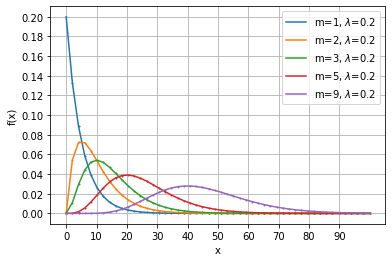

In [8]:
x = np.linspace(0, 100, 50)

plt.plot(x, Erlang_density(1,0.2,x), label='m={}, $\lambda$={}'.format(1, 0.2))
plt.plot(x, Erlang_density(2,0.2,x), label='m={}, $\lambda$={}'.format(2, 0.2))
plt.plot(x, Erlang_density(3,0.2,x), label='m={}, $\lambda$={}'.format(3, 0.2))
plt.plot(x, Erlang_density(5,0.2,x), label='m={}, $\lambda$={}'.format(5, 0.2))
plt.plot(x, Erlang_density(9,0.2,x), label='m={}, $\lambda$={}'.format(9, 0.2))
plt.scatter(x, Erlang_density(1,0.2,x),marker='o', s=1)
plt.scatter(x, Erlang_density(2,0.2,x),marker='o', s=1)
plt.scatter(x, Erlang_density(3,0.2,x),marker='o', s=1)
plt.scatter(x, Erlang_density(5,0.2,x),marker='o', s=1)
plt.scatter(x, Erlang_density(9,0.2,x),marker='o', s=1)

plt.xticks(np.arange(0, 100, step=10))
plt.yticks(np.arange(0, 0.22, step=0.02))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend();
plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ1/Images/Erlang_density.pdf')

## Моделирование случайно величины Эрланга

$$\xi_1+\xi_2+\cdots+\xi_n \sim \Gamma(k, \lambda)$$ где $$\xi_k\sim Exp(\lambda)$$

In [9]:
def random_erlang(k, theta, size=1):
    Erlang_Points = np.zeros(size)
    Exp_Points = np.zeros(k)
    for i in range(size):
        for j in range(k):
            eps = np.random.uniform()
            Exp_Points[j] = -1/theta*np.log(eps)
        S = np.sum(Exp_Points)
        Erlang_Points[i] = S
    Exp_Points = np.sort(Exp_Points)
    return Erlang_Points

In [10]:
def transform_cont_data(erlang_array, split_point):
    max_el = int(np.max(erlang_array)+1)
    steps = np.array([(i,i+1) for i in np.arange(0, max_el, split_point)])
    size = erlang_array.shape[0]
    X = np.arange(1, max_el+1, split_point)
    Y = np.zeros_like(X, dtype='f8')
    j=0
    for i in steps:
        x1 = erlang_array[erlang_array<i[1]]
        x2 = erlang_array[erlang_array>i[0]]
        x = np.intersect1d(x1, x2, assume_unique=True)
        Y[j] = x.shape[0]/size
        j+=1
    return pd.DataFrame(pd.Series(Y, index=X), columns=['''p(x)'''])

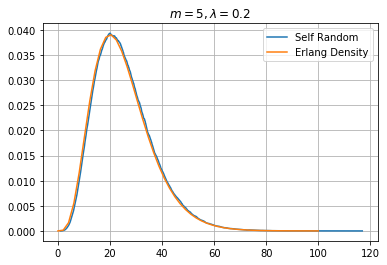

In [11]:
self_data = transform_cont_data(random_erlang(5,0.2,1000000), 0.1)
x = np.linspace(0, 100, 50)

plt.plot(self_data.index, self_data.values, label='Self Random')
plt.plot(x, Erlang_density(5,0.2,x), label='Erlang Density')
plt.title('$m=5, \lambda=0.2$')
plt.grid();
plt.legend();
#plt.savefig('/Users/nikitayurasov/Desktop/3 Курс/Математическая статистика/ДЗ1/Images/Model_Erlang_1000000.pdf')

## Оценка времени

In [12]:
%%timeit
random_erlang(5,0.2,100000)

1.61 s ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
np.random.gamma(5,0.2,100000)

5.73 ms ± 84.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%%timeit
transform_cont_data(random_erlang(5,0.2,1000000), 0.1)

2min 24s ± 8.23 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
